In [1]:
# import all libraries needed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from decimal import Decimal
from math import log
pd.options.mode.chained_assignment = None

In [3]:
# Importing google drive to get access to files

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
gd1 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data1.csv')
gd2 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data2.csv')
gd3 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data3.csv')
gd4 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data4.csv')

gd = pd.concat([gd1, gd2, gd3, gd4])

Mounted at /content/drive


<ipython-input-3-9a327017d647>:10: DtypeWarning: Columns (3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  gd4 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data4.csv')


In [4]:
ssd1 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/steamspy_data_list_1.csv')
ssd2 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/steamspy_data_list_2.csv')
ssd3 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/steamspy_data_list_3.csv')

ssd = pd.concat([ssd1, ssd2, ssd3])

ssd.shape

(73298, 20)

In [6]:
# get shapes
print(gd.shape)
print(ssd.shape)

(73299, 40)
(73298, 20)


In [7]:
# check data types
gd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73299 entries, 0 to 16481
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     73198 non-null  object 
 1   name                     73289 non-null  object 
 2   steam_appid              64680 non-null  float64
 3   required_age             73198 non-null  object 
 4   is_free                  73198 non-null  object 
 5   controller_support       16848 non-null  object 
 6   dlc                      11980 non-null  object 
 7   detailed_description     73128 non-null  object 
 8   about_the_game           73126 non-null  object 
 9   short_description        73135 non-null  object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      73113 non-null  object 
 12  header_image             73198 non-null  object 
 13  website                  37186 non-null  object 
 14  pc_requirements          73

In [8]:
# check data types
ssd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73298 entries, 0 to 23297
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            73298 non-null  int64  
 1   name             73286 non-null  object 
 2   developer        73020 non-null  object 
 3   publisher        72919 non-null  object 
 4   score_rank       42 non-null     float64
 5   positive         73298 non-null  int64  
 6   negative         73298 non-null  int64  
 7   userscore        73298 non-null  int64  
 8   owners           73298 non-null  object 
 9   average_forever  73298 non-null  int64  
 10  average_2weeks   73298 non-null  int64  
 11  median_forever   73298 non-null  int64  
 12  median_2weeks    73298 non-null  int64  
 13  price            73269 non-null  float64
 14  initialprice     73276 non-null  float64
 15  discount         73276 non-null  float64
 16  languages        73195 non-null  object 
 17  genre            

In [9]:
# working first on the game data
gd_copy = gd.copy()
gd_copy.isna().sum()

,0
type,101
name,10
steam_appid,8619
required_age,101
is_free,101
controller_support,56451
dlc,61319
detailed_description,171
about_the_game,173
short_description,164


In [10]:
# drop the unecessary columns
# if na values account for more than 50% of the column, I am dropping it here
dropna_gd = gd_copy[gd_copy.columns.difference(['dlc', 'fullgame', 'legal_notice', 'drm_notice', 'ext_user_account_notice', 'demos', 'metacritic', 'reviews'])]

In [11]:
# check shape and overall dataset again
game_data = dropna_gd.copy()
print(game_data.shape)
print(game_data.info())

(73299, 32)
<class 'pandas.core.frame.DataFrame'>
Index: 73299 entries, 0 to 16481
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   about_the_game        73126 non-null  object 
 1   achievements          41390 non-null  object 
 2   background            73105 non-null  object 
 3   categories            72408 non-null  object 
 4   content_descriptors   73198 non-null  object 
 5   controller_support    16848 non-null  object 
 6   detailed_description  73128 non-null  object 
 7   developers            73005 non-null  object 
 8   genres                73070 non-null  object 
 9   header_image          73198 non-null  object 
 10  is_free               73198 non-null  object 
 11  linux_requirements    73198 non-null  object 
 12  mac_requirements      73198 non-null  object 
 13  movies                70468 non-null  object 
 14  name                  73289 non-null  object 
 15  package_grou

In [12]:
# renaming the columns that will be used to join on the steamspy data
game_data.rename(columns = {'steam_appid' :'appid' , 'developers' : 'developer_game' , 'name' : 'name_game' , 'publishers' : 'publisher_game' , 'genres' : 'genre_game'}, inplace = True)

In [13]:
# working now on the steamspy data
ssd_copy = ssd.copy()
ssd_copy.isna().sum()

,0
appid,0
name,12
developer,278
publisher,379
score_rank,73256
positive,0
negative,0
userscore,0
owners,0
average_forever,0


In [14]:
# drop the unecessary columns
# if na values account for more than 50% of the column, I am dropping it here >12500
dropna_ssd = ssd_copy[ssd_copy.columns.difference(['score_rank'])]

In [15]:
# check shape and overall dataset again
steamspy_data = dropna_ssd.copy()
print(steamspy_data.shape)
print(steamspy_data.info())

(73298, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 73298 entries, 0 to 23297
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            73298 non-null  int64  
 1   average_2weeks   73298 non-null  int64  
 2   average_forever  73298 non-null  int64  
 3   ccu              73298 non-null  int64  
 4   developer        73020 non-null  object 
 5   discount         73276 non-null  float64
 6   genre            72977 non-null  object 
 7   initialprice     73276 non-null  float64
 8   languages        73195 non-null  object 
 9   median_2weeks    73298 non-null  int64  
 10  median_forever   73298 non-null  int64  
 11  name             73286 non-null  object 
 12  negative         73298 non-null  int64  
 13  owners           73298 non-null  object 
 14  positive         73298 non-null  int64  
 15  price            73269 non-null  float64
 16  publisher        72919 non-null  object 
 17  tags 

In [16]:
steamspy_data.head()

,appid,average_2weeks,average_forever,ccu,developer,discount,genre,initialprice,languages,median_2weeks,median_forever,name,negative,owners,positive,price,publisher,tags,userscore
0,10,299,9754,15312,Valve,0.0,Action,999.0,"English, French, German, Italian, Spanish - Sp...",61,268,Counter-Strike,6175,"10,000,000 .. 20,000,000",234532,999.0,Valve,"{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...",0
1,20,0,399,72,Valve,0.0,Action,499.0,"English, French, German, Italian, Spanish - Sp...",0,20,Team Fortress Classic,1097,"5,000,000 .. 10,000,000",7283,499.0,Valve,"{'Action': 764, 'FPS': 327, 'Multiplayer': 277...",0
2,30,211,9183,95,Valve,0.0,Action,499.0,"English, French, German, Italian, Spanish - Spain",211,19,Day of Defeat,675,"1,000,000 .. 2,000,000",6225,499.0,Valve,"{'FPS': 799, 'World War II': 270, 'Multiplayer...",0
3,40,31,582,2,Valve,0.0,Action,499.0,"English, French, German, Italian, Spanish - Sp...",31,16,Deathmatch Classic,524,"5,000,000 .. 10,000,000",2536,499.0,Valve,"{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...",0
4,50,0,846,128,Gearbox Software,0.0,Action,499.0,"English, French, German, Korean",0,270,Half-Life: Opposing Force,1111,"2,000,000 .. 5,000,000",22069,499.0,Valve,"{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...",0


In [17]:
result = pd.merge(steamspy_data, game_data, how="left", on=['appid'])
print(result.shape)
result.info()

(73327, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73327 entries, 0 to 73326
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appid                 73327 non-null  int64  
 1   average_2weeks        73327 non-null  int64  
 2   average_forever       73327 non-null  int64  
 3   ccu                   73327 non-null  int64  
 4   developer             73048 non-null  object 
 5   discount              73305 non-null  float64
 6   genre                 73006 non-null  object 
 7   initialprice          73305 non-null  float64
 8   languages             73224 non-null  object 
 9   median_2weeks         73327 non-null  int64  
 10  median_forever        73327 non-null  int64  
 11  name                  73315 non-null  object 
 12  negative              73327 non-null  int64  
 13  owners                73327 non-null  object 
 14  positive              73327 non-null  int64  
 15  price  

In [18]:
# see which repeated columns we want to keep
check = result[['publisher', 'publisher_game', 'name', 'name_game', 'developer', 'developer_game', 'genre', 'genre_game']]
print(check.info())
check.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73327 entries, 0 to 73326
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   publisher       72948 non-null  object
 1   publisher_game  64115 non-null  object
 2   name            73315 non-null  object
 3   name_game       64667 non-null  object
 4   developer       73048 non-null  object
 5   developer_game  64493 non-null  object
 6   genre           73006 non-null  object
 7   genre_game      64553 non-null  object
dtypes: object(8)
memory usage: 4.5+ MB
None


,publisher,publisher_game,name,name_game,developer,developer_game,genre,genre_game
0,Valve,['Valve'],Counter-Strike,Counter-Strike,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
1,Valve,['Valve'],Team Fortress Classic,Team Fortress Classic,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
2,Valve,['Valve'],Day of Defeat,Day of Defeat,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
3,Valve,['Valve'],Deathmatch Classic,Deathmatch Classic,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
4,Valve,['Valve'],Half-Life: Opposing Force,Half-Life: Opposing Force,Gearbox Software,['Gearbox Software'],Action,"[{'id': '1', 'description': 'Action'}]"


In [19]:
d1 = result[['appid', 'average_2weeks', 'average_forever', 'ccu', 'developer']] # cut developer
d2 = result[['discount', 'genre', 'initialprice', 'languages', 'median_2weeks']] # cut nothing
d3 = result[['median_forever', 'name', 'negative', 'owners', 'positive']] # cut nothing
d4 = result[['price', 'publisher', 'tags', 'userscore', 'about_the_game']] # cut userscore, publisher and about the game, userscore is vastly majority zeros
d5 = result[['achievements', 'background', 'categories', 'content_descriptors', 'detailed_description']] # cut acheievements, background, detailed desc
d6 = result[['developer_game', 'genre_game', 'header_image', 'is_free', 'linux_requirements']] # cut all but is_free
d7 = result[['mac_requirements', 'movies', 'name_game', 'package_groups', 'packages']]  # cut all
d8 = result[['pc_requirements', 'platforms', 'price_overview', 'publisher_game', 'release_date']] # cut all but release date
d9 = result[['required_age', 'screenshots', 'short_description', 'support_info', 'supported_languages', 'type', 'website']] # cut all but required age

In [20]:
# can stay: controller support, website, platforms
# categories looks to be features, multiplayer/familysharing/anticheat
# reccomendations/achievements -> pull the number out
# cut + reason:
# dlc/demos/packages -> lack of time to sort through what the numbers mean, and if it should be a count of dlc
# platform requirements -> unsure what is wanted + theyre a mess to look at
# price overview -> we get similar information on the price, initial price, and discount columns
# score rank is pretty much empty

In [21]:
df = result[['appid', 'name', 'genre', 'price', 'discount', 'initialprice', 'required_age', 'median_2weeks', 'median_forever', 'average_2weeks', 'average_forever', 'ccu',
              'positive', 'negative', 'languages', 'owners', 'tags', 'categories', 'is_free', 'release_date', 'controller_support', 'website', 'platforms', 'recommendations', 'achievements']]
df.head()

,appid,name,genre,price,discount,initialprice,required_age,median_2weeks,median_forever,average_2weeks,...,owners,tags,categories,is_free,release_date,controller_support,website,platforms,recommendations,achievements
0,10,Counter-Strike,Action,999.0,0.0,999.0,0.0,61,268,299,...,"10,000,000 .. 20,000,000","{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...","[{'id': 1, 'description': 'Multi-player'}, {'i...",False,"Nov 1, 2000",NaN,NaN,"{'windows': True, 'mac': True, 'linux': True}",{'total': 152593},NaN
1,20,Team Fortress Classic,Action,499.0,0.0,499.0,0.0,0,20,0,...,"5,000,000 .. 10,000,000","{'Action': 764, 'FPS': 327, 'Multiplayer': 277...","[{'id': 1, 'description': 'Multi-player'}, {'i...",False,"Apr 1, 1999",NaN,NaN,"{'windows': True, 'mac': True, 'linux': True}",{'total': 6250},NaN
2,30,Day of Defeat,Action,499.0,0.0,499.0,0.0,211,19,211,...,"1,000,000 .. 2,000,000","{'FPS': 799, 'World War II': 270, 'Multiplayer...","[{'id': 1, 'description': 'Multi-player'}, {'i...",False,"May 1, 2003",NaN,http://www.dayofdefeat.com/,"{'windows': True, 'mac': True, 'linux': True}",{'total': 4134},NaN
3,40,Deathmatch Classic,Action,499.0,0.0,499.0,0.0,31,16,31,...,"5,000,000 .. 10,000,000","{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...","[{'id': 1, 'description': 'Multi-player'}, {'i...",False,"Jun 1, 2001",NaN,NaN,"{'windows': True, 'mac': True, 'linux': True}",{'total': 2212},NaN
4,50,Half-Life: Opposing Force,Action,499.0,0.0,499.0,0.0,0,270,0,...,"2,000,000 .. 5,000,000","{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...","[{'id': 2, 'description': 'Single-player'}, {'...",False,"Nov 1, 1999",NaN,NaN,"{'windows': True, 'mac': True, 'linux': True}",{'total': 19968},NaN


In [22]:
df['languages'] = df.languages.fillna("")
df['languages'] = df.languages.str.split(',').str.len() # run the cell previous, then run this cell again if this fails
df['price'] = df.price.apply(lambda x: x/100)
df['initialprice'] = df.initialprice.apply(lambda x: x/100)
df['required_age'] = df.required_age.fillna("0")
df.loc[ df['required_age'] == '17+', 'required_age'] = '17'
df['required_age'] = df['required_age'].astype('int64')
df['recommendations'] = df.recommendations.fillna("0")
df['recommendations'] = df.recommendations.str.extract(r'(\d+[.\d]*)')
df['achievements'] = df.achievements.fillna("0")
df['achievements'] = df.achievements.str.extract(r'(\d+[.\d]*)')
df['controller_support'] = (df.controller_support.notnull()).astype('int')
df['website'] = (df.website.notnull()).astype('int')
df['is_free'] = df.is_free.fillna("0")
df['is_free'] = df.is_free.astype('int')

In [ ]:
# TODO
# separate platforms and make binary
# genre
# tags
# categories

In [23]:
print(df.shape)
print(df.info())
df.head()

(73327, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73327 entries, 0 to 73326
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               73327 non-null  int64  
 1   name                73315 non-null  object 
 2   genre               73006 non-null  object 
 3   price               73298 non-null  float64
 4   discount            73305 non-null  float64
 5   initialprice        73305 non-null  float64
 6   required_age        73327 non-null  int64  
 7   median_2weeks       73327 non-null  int64  
 8   median_forever      73327 non-null  int64  
 9   average_2weeks      73327 non-null  int64  
 10  average_forever     73327 non-null  int64  
 11  ccu                 73327 non-null  int64  
 12  positive            73327 non-null  int64  
 13  negative            73327 non-null  int64  
 14  languages           73327 non-null  int64  
 15  owners              73327 non-null  objec

,appid,name,genre,price,discount,initialprice,required_age,median_2weeks,median_forever,average_2weeks,...,owners,tags,categories,is_free,release_date,controller_support,website,platforms,recommendations,achievements
0,10,Counter-Strike,Action,9.99,0.0,9.99,0,61,268,299,...,"10,000,000 .. 20,000,000","{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Nov 1, 2000",0,0,"{'windows': True, 'mac': True, 'linux': True}",152593,0
1,20,Team Fortress Classic,Action,4.99,0.0,4.99,0,0,20,0,...,"5,000,000 .. 10,000,000","{'Action': 764, 'FPS': 327, 'Multiplayer': 277...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Apr 1, 1999",0,0,"{'windows': True, 'mac': True, 'linux': True}",6250,0
2,30,Day of Defeat,Action,4.99,0.0,4.99,0,211,19,211,...,"1,000,000 .. 2,000,000","{'FPS': 799, 'World War II': 270, 'Multiplayer...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"May 1, 2003",0,1,"{'windows': True, 'mac': True, 'linux': True}",4134,0
3,40,Deathmatch Classic,Action,4.99,0.0,4.99,0,31,16,31,...,"5,000,000 .. 10,000,000","{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Jun 1, 2001",0,0,"{'windows': True, 'mac': True, 'linux': True}",2212,0
4,50,Half-Life: Opposing Force,Action,4.99,0.0,4.99,0,0,270,0,...,"2,000,000 .. 5,000,000","{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...","[{'id': 2, 'description': 'Single-player'}, {'...",0,"Nov 1, 1999",0,0,"{'windows': True, 'mac': True, 'linux': True}",19968,0


In [24]:
#df.to_csv('/content/drive/MyDrive/Dat490/Data/combined_df_cleaned.csv', index=False)
df_cleaned = pd.read_csv('/content/drive/MyDrive/Dat490/Data/combined_df_cleaned.csv')
df_cleaned.head()

,appid,name,genre,price,discount,initialprice,required_age,median_2weeks,median_forever,average_2weeks,...,owners,tags,categories,is_free,release_date,controller_support,website,platforms,recommendations,achievements
0,10,Counter-Strike,Action,9.99,0.0,9.99,0,61,268,299,...,"10,000,000 .. 20,000,000","{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Nov 1, 2000",0,0,"{'windows': True, 'mac': True, 'linux': True}",152593,0
1,20,Team Fortress Classic,Action,4.99,0.0,4.99,0,0,20,0,...,"5,000,000 .. 10,000,000","{'Action': 764, 'FPS': 327, 'Multiplayer': 277...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Apr 1, 1999",0,0,"{'windows': True, 'mac': True, 'linux': True}",6250,0
2,30,Day of Defeat,Action,4.99,0.0,4.99,0,211,19,211,...,"1,000,000 .. 2,000,000","{'FPS': 799, 'World War II': 270, 'Multiplayer...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"May 1, 2003",0,1,"{'windows': True, 'mac': True, 'linux': True}",4134,0
3,40,Deathmatch Classic,Action,4.99,0.0,4.99,0,31,16,31,...,"5,000,000 .. 10,000,000","{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Jun 1, 2001",0,0,"{'windows': True, 'mac': True, 'linux': True}",2212,0
4,50,Half-Life: Opposing Force,Action,4.99,0.0,4.99,0,0,270,0,...,"2,000,000 .. 5,000,000","{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...","[{'id': 2, 'description': 'Single-player'}, {'...",0,"Nov 1, 1999",0,0,"{'windows': True, 'mac': True, 'linux': True}",19968,0


In [25]:
#converting release_date to days_released:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], format='%b %d, %Y', errors='coerce')
# The errors='coerce' argument tells the function to replace invalid values with NaT (Not a Time)
today = pd.to_datetime('today')
df_cleaned['days_released'] = (today - df_cleaned['release_date']).dt.days

# Function to extract the upper limit (max value) from the owner range
def get_max_owners(owner_range):
    # Remove commas and split by '..'
    range_parts = owner_range.replace(',', '').split('..')
    # Take the upper limit, strip any extra spaces, and convert to an integer
    return int(range_parts[1].strip())

# Apply the function to the 'owners' column to create a new column with the max values
df_cleaned['max_owners'] = df_cleaned['owners'].apply(get_max_owners)
df_cleaned.head()
df_cleaned.drop(columns=['owners'], inplace=True)

# if owners = 20k replace with 10k:
df_cleaned['max_owners'] = df_cleaned['max_owners'].replace(20000, 10000)

In [26]:
# all games where days_released is less than 1:
df_cleaned[df_cleaned['days_released'] < 10]
#dropping games with less than 1 days_released:
df_cleaned = df_cleaned[df_cleaned['days_released'] > 1]

In [27]:
pd.set_option('display.max_columns', 26)

reg_df = df_cleaned.copy()
reg_df = reg_df.drop(columns=[ 'languages', 'required_age', 'categories', 'is_free', 'release_date', 'controller_support', 'website', 'platforms', 'price', 'discount', 'average_2weeks', 'average_forever', 'achievements'])
reg_df.head()

#move tags so it's 4th column:
tags = reg_df.pop('tags')
reg_df.insert(3, 'tags', tags)


#creating positive / days_released as PosPerDay:
reg_df['PosPerDay'] = reg_df['positive'] / reg_df['days_released']
reg_df['NegPerDay'] = reg_df['negative'] / reg_df['days_released']
reg_df['RecsPerDay'] = reg_df['recommendations'] / reg_df['days_released']
reg_df['MaxOwnersPerDay'] = reg_df['max_owners'] / reg_df['days_released']
reg_df.head()

print(reg_df.drop(columns=['appid', 'name', 'genre', 'tags']).nunique())
reg_df.isna().sum()

print(reg_df.drop(columns=['appid', 'name', 'genre', 'tags']).nunique())
print(reg_df.info())

#how many nulls?
reg_df.isna().sum()

print((reg_df == 0).sum())

initialprice         300
median_2weeks        363
median_forever      1663
ccu                 1160
positive            5037
negative            2516
recommendations     4511
days_released       4613
max_owners            14
PosPerDay          42127
NegPerDay          31966
RecsPerDay         14479
MaxOwnersPerDay    11605
dtype: int64
initialprice         300
median_2weeks        363
median_forever      1663
ccu                 1160
positive            5037
negative            2516
recommendations     4511
days_released       4613
max_owners            14
PosPerDay          42127
NegPerDay          31966
RecsPerDay         14479
MaxOwnersPerDay    11605
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 64369 entries, 0 to 73326
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            64369 non-null  int64  
 1   name             64359 non-null  object 
 2   genre            64157 non-null

<Axes: >

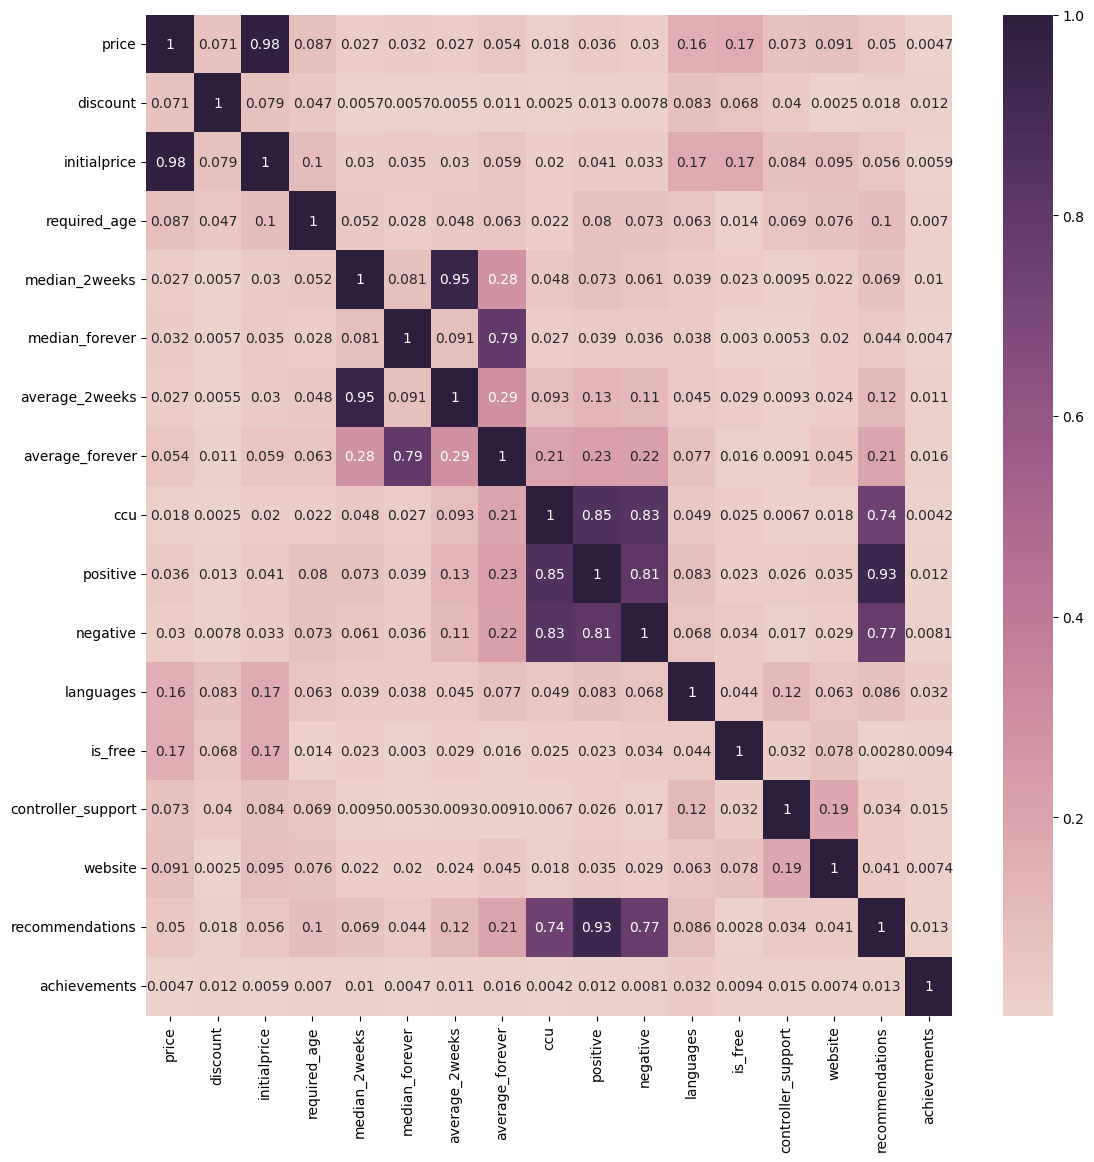

In [32]:
df1 = df[['price', 'discount', 'initialprice', 'required_age', 'median_2weeks', 'median_forever', 'average_2weeks', 'average_forever', 'ccu',
              'positive', 'negative', 'languages', 'is_free', 'controller_support', 'website', 'recommendations', 'achievements']]
fig, ax1 = plt.subplots(figsize=(13, 13))
sns.heatmap(np.abs(df1.corr()), annot=True, ax=ax1, cmap = sns.cubehelix_palette(as_cmap = True))

Looking over the heat map, all the high correlations make sense and seem like things we expected to see have correlations

In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop 'appid', 'name', 'genre', 'tags' as they shouldn't be scaled
features_to_scale = reg_df.drop(columns=['appid', 'name', 'genre', 'tags'])

# Log transform all relevant columns (including 'max_owners')
columns_to_log_transform = [
    'MaxOwnersPerDay', 'initialprice', 'median_2weeks', 'median_forever',
    'ccu', 'PosPerDay', 'NegPerDay', 'RecsPerDay'
]

# Apply log1p transformation to avoid log(0)
for col in columns_to_log_transform:
    features_to_scale[f'log_{col}'] = np.log1p(features_to_scale[col])

# Remove the original columns that were log-transformed
features_to_scale = features_to_scale.drop(columns=columns_to_log_transform)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the remaining features
scaled_features = scaler.fit_transform(features_to_scale)

# Convert the scaled features back into a DataFrame
df_scaled_feat = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Concatenate 'appid', 'name', 'genre', and 'tags' with the scaled features
success_df_final = pd.concat([reg_df[['appid', 'name', 'genre', 'tags']], df_scaled_feat], axis=1)

# Output the final DataFrame
print(success_df_final.info())
print(success_df_final.head())

<class 'pandas.core.frame.DataFrame'>
Index: 73326 entries, 0 to 62655
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                64369 non-null  float64
 1   name                 64359 non-null  object 
 2   genre                64157 non-null  object 
 3   tags                 64369 non-null  object 
 4   positive             64369 non-null  float64
 5   negative             64369 non-null  float64
 6   recommendations      64369 non-null  float64
 7   days_released        64369 non-null  float64
 8   max_owners           64369 non-null  float64
 9   log_MaxOwnersPerDay  64369 non-null  float64
 10  log_initialprice     64369 non-null  float64
 11  log_median_2weeks    64369 non-null  float64
 12  log_median_forever   64369 non-null  float64
 13  log_ccu              64369 non-null  float64
 14  log_PosPerDay        64369 non-null  float64
 15  log_NegPerDay        64369 non-null  floa

In [34]:
indie_weights = {
    'log_users_per_day': 0.45,  # Scaled ownership
    'median_2weeks': 0.20,  # Recent engagement
    'median_forever': 0.05,  # Long-term engagement
    'ccu': 0.0,  # Concurrent users
    'feedback': 0.15,  # Feedback score (positive/negative)
    'recommendations': 0.15  # Recommendations per day
}

non_indie_weights = {
    'log_users_per_day': 0.575,  # Scaled ownership
    'median_2weeks': 0.10,  # Recent engagement
    'median_forever': 0.1,  # Long-term engagement
    'ccu': 0,  # Concurrent users
    'feedback': 0.125,  # Feedback score (positive/negative)
    'recommendations': 0.05  # Recommendations per day
}

def sanity_check(weights):
    # Calculate the overall contribution for each category
    engagement = weights['median_2weeks'] + weights['median_forever']
    player_feedback = weights['feedback'] + weights['recommendations']
    commercial_success = weights['log_users_per_day']+ weights['ccu']

    total_weight = engagement + player_feedback + commercial_success

    # Calculate percentage contributions
    engagement_pct = (engagement / total_weight) * 100
    player_feedback_pct = (player_feedback / total_weight) * 100
    commercial_success_pct = (commercial_success / total_weight) * 100

    print(f"Engagement: {engagement_pct:.2f}%")
    print(f"Player Feedback: {player_feedback_pct:.2f}%")
    print(f"Commercial Success: {commercial_success_pct:.2f}%")

# Example usage for Indie and Non-Indie weights
print("Indie Game Weights:")
sanity_check(indie_weights)

print("\nNon-Indie Game Weights:")
sanity_check(non_indie_weights)


Indie Game Weights:
Engagement: 25.00%
Player Feedback: 30.00%
Commercial Success: 45.00%

Non-Indie Game Weights:
Engagement: 21.05%
Player Feedback: 18.42%
Commercial Success: 60.53%


In [35]:
# Making a function to loop through the dataframe to add column for success target variable

# Tried to replicate the formula from discord below, certain metrics I wasn't sure about (users/days released, positive reviews/days and review ratio), feel free to edit the metrics
# Once the formula is finished, should work to properly assign if a game is successful or not and then will create a new success column in the dataframe

def success(df, start, end, indie_weights, non_indie_weights):
    success = []

    # set all nan as zero
    df = df.fillna(0)



    for i in range(start, end):
        # Determine if the game is Indie based on 'genre' or 'tags'
        if "Indie" in str(df.iloc[i]['genre']) or "Indie" in str(df.iloc[i]['tags']):
            weights = indie_weights
        else:
            weights = non_indie_weights

        # Calculate feedback score using the log-transformed columns
        total_reviews = df.iloc[i]['log_PosPerDay'] + df.iloc[i]['log_NegPerDay']
        feedback_score = 0 if total_reviews == 0 else max(0, (df.iloc[i]['log_PosPerDay'] - 1 / (total_reviews + 1))  + (1 - (df.iloc[i]['log_NegPerDay'] - 1 / (total_reviews + 1))))

        # Apply the formula to compute the success metric using log-transformed values
        metric = (
            weights['log_users_per_day'] * df.iloc[i]['log_MaxOwnersPerDay']  +
            weights['median_2weeks'] * df.iloc[i]['log_median_2weeks'] +
            weights['median_forever'] * df.iloc[i]['log_median_forever'] +
            weights['ccu'] * df.iloc[i]['log_ccu'] +
            weights['feedback'] * feedback_score +
            weights['recommendations'] * df.iloc[i]['recommendations']
        )

        success.append(metric)

    return success

In [36]:
#df_sample = success_df_final.sample(1000, random_state=0)
#success_scores = success(df_sample, 0, len(df_sample), indie_weights, non_indie_weights)

success_scores = success(success_df_final, 0, len(success_df_final), indie_weights, non_indie_weights)
#joining success_scores with success_df_final

#df_sample['success'] = success_scores
success_df_final['success'] = success_scores
success_df_final.sample(10)

,appid,name,genre,tags,positive,negative,recommendations,days_released,max_owners,log_MaxOwnersPerDay,log_initialprice,log_median_2weeks,log_median_forever,log_ccu,log_PosPerDay,log_NegPerDay,log_RecsPerDay,success
34140,1158980.0,Idle Big Devil,"Adventure, Casual, Free To Play, Indie, Strategy","{'Free to Play': 202, 'Strategy': 191, 'Casual...",-0.046504,-0.040185,-0.052897,-0.009685,-0.066787,-0.798069,-0.645967,-0.093007,-0.392624,-0.416928,-0.332082,-0.236245,-0.285780,-0.269674
19857,756980.0,Raymond's Obstacle Course,"Action, Adventure, Casual, Indie, Strategy","{'Strategy': 22, 'Action': 22, 'Adventure': 22...",-0.043722,-0.039314,-0.052897,0.663331,-0.066787,-1.018357,0.552768,-0.093007,-0.392624,0.390297,-0.265870,-0.229113,-0.285780,-0.359941
53450,1837750.0,Demeo: PC Edition,"Adventure, Indie, RPG, Strategy","{'Turn-Based Tactics': 137, 'Dungeon Crawler':...",-0.046282,-0.039895,-0.052897,-0.896994,-0.066787,-0.180209,3.535585,-0.093007,-0.392624,-0.416928,-0.284756,-0.217291,-0.285780,0.012619
11143,516790.0,Fat Mask,"Action, Indie","{'Local Multiplayer': 155, 'Competitive': 149,...",-0.045308,-0.036845,-0.052897,1.014906,-0.052273,-0.152673,0.647570,-0.093007,-0.392624,-0.416928,-0.311637,-0.210246,-0.285780,0.019921
14885,622150.0,Bridge to Another World: Burnt Dreams Collecto...,"Adventure, Casual","{'Adventure': 21, 'Casual': 21, 'Hidden Object...",-0.045809,-0.040185,-0.052897,0.758759,-0.066787,-1.042603,0.044487,-0.093007,-0.392624,-0.416928,-0.319861,-0.237743,-0.285780,-0.535970
46156,NaN,NaN,NaN,NaN,-0.046782,-0.040330,-0.052897,-0.625779,-0.066787,-0.449042,0.044487,-0.093007,-0.392624,-0.416928,-0.340234,-0.236679,-0.285780,-0.197351
39193,NaN,NaN,NaN,NaN,-0.046699,-0.040330,-0.052897,-0.286760,-0.052273,0.347230,-1.050549,-0.093007,-0.392624,-0.416928,-0.337974,-0.237827,-0.285780,0.260931
52653,1804760.0,SEARCH ALL - CANDY,"Casual, Indie","{'Exploration': 176, 'Trading Card Game': 170,...",-0.046476,-0.038297,-0.052897,-0.872719,-0.052273,0.839149,-1.050549,-0.093007,-0.392624,-0.416928,-0.306808,-0.158267,-0.285780,0.459169
63725,2347280.0,Usurper,Strategy,"{'Roguelike Deckbuilder': 109, 'Chess': 103, '...",-0.046838,-0.040476,-0.052897,-1.323908,-0.066787,1.043191,-0.359261,-0.093007,-0.392624,-0.416928,-0.326877,-0.240457,-0.285780,0.662824
29640,1031130.0,Bat Hotel,"Adventure, Casual, RPG, Simulation","{'Casual': 32, 'Nudity': 31, 'RPG': 30, 'Simul...",-0.042609,-0.035102,-0.045725,0.252323,-0.052273,0.090504,0.813714,-0.093007,-0.392624,-0.416928,-0.212559,-0.175455,-0.125866,0.121552


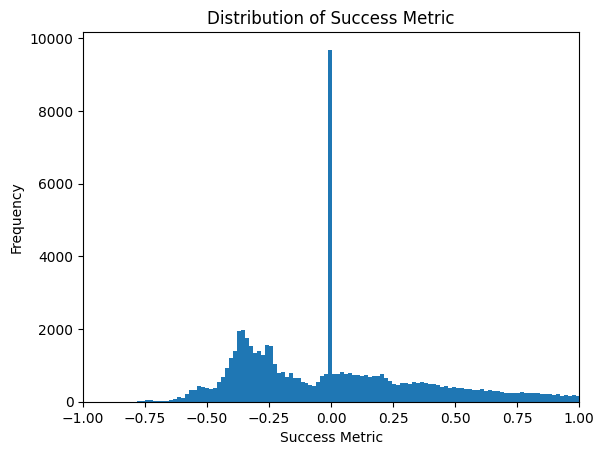

0.25   -0.281943
0.50    0.000000
0.75    0.332367
Name: success, dtype: float64


In [37]:
from matplotlib import pyplot as plt

# histogram of success
plt.hist(success_df_final['success'], bins=1000)
# axis from -1 to 1:
plt.xlim(-1, 1)
plt.xlabel('Success Metric')
plt.ylabel('Frequency')
plt.title('Distribution of Success Metric')
plt.show()

# quantiles of success:
print(success_df_final['success'].quantile([0.25, 0.5, 0.75]))

Very interesting that the most frequent score is 0

In [38]:
#converting 3rd quantile to threshold:
threshold = success_df_final['success'].quantile(0.85)
print(threshold)

# converting success to binary based on threshold:
success_df_final['success_binary'] = np.where(success_df_final['success'] >= threshold, 1, 0)

# on appid joining success and success_binary to reg_df:
df_full = reg_df.merge(success_df_final[['appid', 'success', 'success_binary']], on='appid', how='left') # Merging with reg_df

0.6116845023664601


In [39]:
df_full.sample(10)

,appid,name,genre,tags,initialprice,median_2weeks,median_forever,ccu,positive,negative,recommendations,days_released,max_owners,PosPerDay,NegPerDay,RecsPerDay,MaxOwnersPerDay,success,success_binary
17347,696530,Lake Ridden,"Adventure, Indie","{'Adventure': 50, 'Indie': 47, 'Puzzle': 31, '...",12.99,0,0,0,209,75,204,2326.0,50000,0.089854,0.032244,0.087704,21.496131,0.058843,0
39601,1342270,Nofrills Solitaire,"Casual, Indie","{'Solitaire': 72, 'Casual': 65, 'Card Game': 4...",1.99,0,0,0,11,0,0,1550.0,100000,0.007097,0.000000,0.000000,64.516129,-0.248502,0
53399,2271890,Firework Simulator,"Indie, Simulation","{'Sandbox': 71, 'Simulation': 65, 'Indie': 51,...",11.99,0,0,0,1,1,0,598.0,10000,0.001672,0.001672,0.000000,16.722408,0.867004,1
22669,840120,Pi is Everything,"Casual, Indie","{'Indie': 31, 'Casual': 31}",0.00,0,0,0,2,2,0,2334.0,10000,0.000857,0.000857,0.000000,4.284490,-0.180558,0
53062,2253940,B.C. Bill (C64/Spectrum),Action,"{'Retro': 49, 'Action': 46, 'Arcade': 43, ""Bea...",3.99,0,0,0,2,0,0,620.0,10000,0.003226,0.000000,0.000000,16.129032,0.389492,0
48726,2027850,RecNaviClub,"Casual, Sports, Strategy","{'Strategy': 362, 'Card Game': 336, 'Battle Ro...",15.99,0,0,0,4,1,0,738.0,10000,0.005420,0.001355,0.000000,13.550136,0.099720,0
21856,816630,Monkey King: Master of the Clouds | 中華大仙,Action,"{'Action': 33, ""Shoot 'Em Up"": 16, 'Arcade': 1...",4.99,0,0,0,14,7,0,2199.0,10000,0.006367,0.003183,0.000000,4.547522,-0.502722,0
56435,2441120,Viking Heroes 4,"Adventure, Casual, Indie, Strategy","{'Casual': 213, 'Strategy': 207, 'Management':...",6.99,0,0,2,9,1,0,472.0,10000,0.019068,0.002119,0.000000,21.186441,0.000000,0
24706,893870,Trials of Ascension: Exile,"Action, Adventure, RPG, Early Access","{'RPG': 86, 'Action': 85, 'Adventure': 84, 'Dr...",9.99,0,0,0,30,30,0,2249.0,10000,0.013339,0.013339,0.000000,4.446421,0.658014,1
53092,2255820,Dawn Of Hell,"Action, Adventure, Indie, Strategy","{'Action-Adventure': 296, 'Medieval': 289, '3D...",1.99,0,0,0,7,7,0,579.0,50000,0.012090,0.012090,0.000000,86.355786,0.371897,0


Random Forest Model

*This can't be run until the success metric is figured out properly.*
*I figured that classifier would be the best bet for this since we're figuring out a binary target variable (success or not), if this changes that's perfectly fine!*

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfmod = RandomForestClassifier(n_estimators = 100)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:21].values
y = df.iloc[:, 21]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 254)